In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset

In [221]:
dataA = pd.read_csv('https://raw.githubusercontent.com/azizpandoyo/UAS-AI/main/A.csv')
dataB = pd.read_csv('https://raw.githubusercontent.com/azizpandoyo/UAS-AI/main/B.csv')
dataC = pd.read_csv('https://raw.githubusercontent.com/azizpandoyo/UAS-AI/main/C.csv')

In [224]:
dataA.head()

DEPTH_MD       CALI  RSHA      RMED      RDEP  RHOB          GR  NPHI  \
0  734.419199  12.787381   NaN  1.407795  1.472684   NaN  118.992989   NaN   
1  734.571200  12.790987   NaN  1.394810  1.464091   NaN  124.514305   NaN   
2  734.723199  12.801331   NaN  1.377496  1.434632   NaN  126.779854   NaN   
3  734.875200  12.628396   NaN  1.369218  1.419665   NaN  127.186066   NaN   
4  735.027200  12.528492   NaN  1.373198  1.427742   NaN  125.184708   NaN   

   PEF         DTC  SP     BS        ROP  DRHO  FACIES  
0  NaN  154.404816 NaN  9.875  26.911829   NaN       1  
1  NaN  154.974701 NaN  9.875  26.133530   NaN       1  
2  NaN  155.762970 NaN  9.875  27.482636   NaN       1  
3  NaN  156.187897 NaN  9.875  28.694523   NaN       1  
4  NaN  157.038986 NaN  9.875  28.981676   NaN       1

In [225]:
dataB.head()

DEPTH_MD       CALI  RSHA      RMED      RDEP  RHOB         GR      NPHI  \
0  684.270396  13.042573   NaN  1.414800  1.419300   NaN  88.937462  0.455408   
1  684.422396  13.333869   NaN  1.392074  1.398481   NaN  87.800705  0.450693   
2  684.574396  13.426064   NaN  1.435466  1.449827   NaN  86.460014  0.450432   
3  684.726396  13.320748   NaN  1.458956  1.479819   NaN  85.662811  0.461263   
4  684.878396  13.156784   NaN  1.394103  1.403053   NaN  86.043411  0.464723   

   PEF         DTC  SP     BS        ROP  DRHO  FACIES  
0  NaN  159.805603 NaN  9.875  39.320923   NaN       1  
1  NaN  158.900360 NaN  9.875  33.086723   NaN       1  
2  NaN  156.982590 NaN  9.875  28.410923   NaN       1  
3  NaN  155.278259 NaN  9.875  19.690228   NaN       1  
4  NaN  155.096039 NaN  9.875  15.122011   NaN       1

In [226]:
dataC.head()

DEPTH_MD       CALI  RSHA      RMED      RDEP  RHOB         GR      NPHI  \
0  735.186799  13.305768   NaN  1.173534  1.168746   NaN  95.069916  0.106903   
1  735.338799  13.382214   NaN  1.173070  1.168229   NaN  93.822601  0.108549   
2  735.490799  13.448009   NaN  1.166865  1.160968   NaN  92.680122  0.114742   
3  735.642799  13.309155   NaN  1.158761  1.150311   NaN  93.568855  0.120261   
4  735.794799  13.254792   NaN  1.157357  1.146551   NaN  95.206711  0.124738   

   PEF  DTC  SP     BS        ROP  DRHO  FACIES  
0  NaN  NaN NaN  9.875  28.763554   NaN       1  
1  NaN  NaN NaN  9.875  28.810400   NaN       1  
2  NaN  NaN NaN  9.875  28.997326   NaN       1  
3  NaN  NaN NaN  9.875  29.191469   NaN       1  
4  NaN  NaN NaN  9.875  29.253410   NaN       1

# Training Dataset (Well-A)

## Data Exploratory & Preprocessing

In [227]:
dataA.describe()

DEPTH_MD          CALI  RSHA          RMED          RDEP  \
count  10708.000000  10708.000000   0.0  10675.000000  10699.000000   
mean    1548.151200     11.950260   NaN      1.961810      2.429378   
std      469.874207      1.397405   NaN      8.850138      9.278286   
min      734.419199      8.145307   NaN      0.474081      0.486116   
25%     1141.285200     12.251666   NaN      0.899736      0.923974   
50%     1548.151200     12.354126   NaN      1.171032      1.189772   
75%     1955.017200     12.594305   NaN      1.617270      1.634245   
max     2361.883200     14.336007   NaN    726.232300    164.291443   

               RHOB            GR          NPHI           PEF           DTC  \
count  10396.000000  10708.000000  10565.000000  10396.000000  10643.000000   
mean       2.192330     77.563081      0.364623      3.997361    121.281544   
std        0.168446     37.323180      0.119055      1.250122     25.101314   
min        1.693096     11.502922      0.050570      1.658541     54.553902   
25%        2.073405     47.014977      0.253130      3.142870     97.754444   
50%        2.153903     82.617432      0.383974      3.600720    133.448593   
75%        2.348827    105.282234      0.462687      4.605149    140.252808   
max        2.789680    183.531326      0.768312     11.641782    169.838211   

        SP            BS           ROP          DRHO        FACIES  
count  0.0  10708.000000  10708.000000  10472.000000  10708.000000  
mean   NaN     11.631062     26.305218     -0.005509      2.369817  
std    NaN      1.376402     16.751751      0.017869      1.707573  
min    NaN      8.500000      0.703106     -0.107703      1.000000  
25%    NaN     12.250001     13.320444     -0.014262      1.000000  
50%    NaN     12.250001     25.066311     -0.008271      2.000000  
75%    NaN     12.250001     36.628877     -0.000303      4.000000  
max    NaN     12.250001    299.693603      0.433157      6.000000

In [228]:
dataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10708 entries, 0 to 10707
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPTH_MD  10708 non-null  float64
 1   CALI      10708 non-null  float64
 2   RSHA      0 non-null      float64
 3   RMED      10675 non-null  float64
 4   RDEP      10699 non-null  float64
 5   RHOB      10396 non-null  float64
 6   GR        10708 non-null  float64
 7   NPHI      10565 non-null  float64
 8   PEF       10396 non-null  float64
 9   DTC       10643 non-null  float64
 10  SP        0 non-null      float64
 11  BS        10708 non-null  float64
 12  ROP       10708 non-null  float64
 13  DRHO      10472 non-null  float64
 14  FACIES    10708 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.2 MB


#### Remove Data Points That Don't Have A Valid 'RMED' Entry

In [229]:
RMEP_mask = dataA['RMED'].notnull().values
dataA = dataA[RMEP_mask]
dataA.describe()

DEPTH_MD          CALI  RSHA          RMED          RDEP  \
count  10675.000000  10675.000000   0.0  10675.000000  10675.000000   
mean    1546.229956     11.958575   NaN      1.961810      2.431804   
std      469.280218      1.391319   NaN      8.850138      9.288570   
min      734.419199      8.145307   NaN      0.474081      0.486116   
25%     1140.031200     12.253389   NaN      0.899736      0.923285   
50%     1545.643200     12.354868   NaN      1.171032      1.188499   
75%     1951.255200     12.595449   NaN      1.617270      1.636809   
max     2360.515200     14.336007   NaN    726.232300    164.291443   

               RHOB            GR          NPHI           PEF           DTC  \
count  10387.000000  10675.000000  10541.000000  10387.000000  10619.000000   
mean       2.192128     77.641295      0.364656      3.997929    121.311284   
std        0.168380     37.339553      0.119181      1.250513     25.121357   
min        1.693096     11.502922      0.050570      1.658541     54.553902   
25%        2.073291     47.184948      0.252802      3.142595     97.667866   
50%        2.153829     82.782715      0.384727      3.602031    133.472534   
75%        2.348673    105.321594      0.462824      4.606819    140.255348   
max        2.789680    183.531326      0.768312     11.641782    169.838211   

        SP            BS           ROP          DRHO        FACIES  
count  0.0  10675.000000  10675.000000  10459.000000  10675.000000  
mean   NaN     11.632310     26.363512     -0.005570      2.361124  
std    NaN      1.375213     16.738993      0.017321      1.701405  
min    NaN      8.500000      0.717965     -0.107703      1.000000  
25%    NaN     12.250001     13.441561     -0.014266      1.000000  
50%    NaN     12.250001     25.105547     -0.008285      2.000000  
75%    NaN     12.250001     36.679111     -0.000324      4.000000  
max    NaN     12.250001    299.693603      0.226949      6.000000

#### Remove Data Points That Don't Have A Valid 'RHOB' Entry

In [230]:
RHOB_mask = dataA['RHOB'].notnull().values
dataA = dataA[RHOB_mask]
dataA.describe()

DEPTH_MD          CALI  RSHA          RMED          RDEP  \
count  10387.000000  10387.000000   0.0  10387.000000  10387.000000   
mean    1548.072156     11.954876   NaN      1.982065      2.464286   
std      462.449077      1.397821   NaN      8.971093      9.414340   
min      754.179199      8.145307   NaN      0.474081      0.486116   
25%     1148.847200     12.256275   NaN      0.893519      0.917000   
50%     1543.515200     12.354404   NaN      1.167850      1.186059   
75%     1938.183200     12.583114   NaN      1.635802      1.657929   
max     2360.515200     13.962205   NaN    726.232300    164.291443   

               RHOB            GR          NPHI           PEF           DTC  \
count  10387.000000  10387.000000  10383.000000  10387.000000  10331.000000   
mean       2.192128     77.108555      0.364678      3.997929    121.054617   
std        0.168380     37.603709      0.120034      1.250513     25.210178   
min        1.693096     11.502922      0.050570      1.658541     54.553902   
25%        2.073291     46.376364      0.250872      3.142595     96.205799   
50%        2.153829     81.898331      0.387837      3.602031    133.519119   
75%        2.348673    105.024250      0.463712      4.606819    140.188782   
max        2.789680    183.531326      0.768312     11.641782    169.838211   

        SP            BS           ROP          DRHO        FACIES  
count  0.0  10387.000000  10387.000000  10387.000000  10387.000000  
mean   NaN     11.644908     26.496759     -0.005663      2.322807  
std    NaN      1.378056     16.899205      0.017258      1.657997  
min    NaN      8.500000      0.836583     -0.107703      1.000000  
25%    NaN     12.250001     13.379519     -0.014315      1.000000  
50%    NaN     12.250001     25.124615     -0.008330      2.000000  
75%    NaN     12.250001     37.022348     -0.000434      4.000000  
max    NaN     12.250001    299.693603      0.226949      6.000000

#### Remove Data Points That Don't Have A Valid 'NPHI' Entry

In [231]:
NPHI_mask = dataA['NPHI'].notnull().values
dataA = dataA[NPHI_mask]
dataA.describe()

DEPTH_MD          CALI  RSHA          RMED          RDEP  \
count  10383.000000  10383.000000   0.0  10383.000000  10383.000000   
mean    1547.759254     11.956179   NaN      1.982035      2.464444   
std      462.263214      1.396511   NaN      8.972821      9.416150   
min      754.179199      8.145307   NaN      0.474081      0.486116   
25%     1148.695200     12.256509   NaN      0.893485      0.916856   
50%     1543.211200     12.354485   NaN      1.167721      1.185934   
75%     1937.727200     12.583417   NaN      1.634019      1.657328   
max     2359.907200     13.962205   NaN    726.232300    164.291443   

               RHOB            GR          NPHI           PEF           DTC  \
count  10383.000000  10383.000000  10383.000000  10383.000000  10331.000000   
mean       2.192047     77.109243      0.364678      3.998229    121.054617   
std        0.168361     37.610935      0.120034      1.250661     25.210178   
min        1.693096     11.502922      0.050570      1.658541     54.553902   
25%        2.073272     46.355373      0.250872      3.142494     96.205799   
50%        2.153784     81.913506      0.387837      3.602931    133.519119   
75%        2.348405    105.036205      0.463712      4.607040    140.188782   
max        2.789680    183.531326      0.768312     11.641782    169.838211   

        SP            BS           ROP          DRHO        FACIES  
count  0.0  10383.000000  10383.000000  10383.000000  10383.000000  
mean   NaN     11.646119     26.500224     -0.005664      2.322546  
std    NaN      1.376938     16.901530      0.017262      1.658263  
min    NaN      8.500000      0.836583     -0.107703      1.000000  
25%    NaN     12.250001     13.359899     -0.014319      1.000000  
50%    NaN     12.250001     25.126966     -0.008336      2.000000  
75%    NaN     12.250001     37.030354     -0.000433      4.000000  
max    NaN     12.250001    299.693603      0.226949      6.000000

#### Remove Data Points That Don't Have A Valid 'DTC' Entry

In [232]:
DTC_mask = dataA['DTC'].notnull().values
dataA = dataA[DTC_mask]
dataA.describe()

DEPTH_MD          CALI  RSHA          RMED          RDEP  \
count  10331.000000  10331.000000   0.0  10331.000000  10331.000000   
mean    1543.690903     11.973581   NaN      1.982144      2.466895   
std      459.845325      1.378252   NaN      8.995353      9.439729   
min      754.179199      8.145307   NaN      0.474081      0.486116   
25%     1146.719200     12.258733   NaN      0.891874      0.915696   
50%     1539.259200     12.355339   NaN      1.164909      1.182960   
75%     1931.799200     12.586003   NaN      1.626006      1.647457   
max     2352.003200     13.962205   NaN    726.232300    164.291443   

               RHOB            GR          NPHI           PEF           DTC  \
count  10331.000000  10331.000000  10331.000000  10331.000000  10331.000000   
mean       2.191144     77.151132      0.365483      4.002455    121.054617   
std        0.168275     37.697471      0.119788      1.252292     25.210178   
min        1.693096     11.502922      0.050570      1.658541     54.553902   
25%        2.072849     46.216795      0.252797      3.143406     96.205799   
50%        2.152752     82.161568      0.389613      3.607939    133.519119   
75%        2.347348    105.116516      0.464026      4.613238    140.188782   
max        2.789680    183.531326      0.768312     11.641782    169.838211   

        SP            BS           ROP          DRHO        FACIES  
count  0.0  10331.000000  10331.000000  10331.000000  10331.000000  
mean   NaN     11.661955     26.540963     -0.005731      2.322718  
std    NaN      1.362140     16.928749      0.017256      1.662119  
min    NaN      8.500000      0.836583     -0.107703      1.000000  
25%    NaN     12.250001     13.359899     -0.014350      1.000000  
50%    NaN     12.250001     25.160027     -0.008398      2.000000  
75%    NaN     12.250001     37.099487     -0.000537      4.000000  
max    NaN     12.250001    299.693603      0.226949      6.000000

#### Remove Features That Are Not Needed

In [233]:
dataA.drop(labels=['RSHA', 'SP', 'BS', 'ROP', 'DRHO'], axis=1, inplace=True)
dataA

DEPTH_MD       CALI      RMED      RDEP      RHOB          GR  \
130     754.179199  12.521476  1.412026  1.315972  2.079341  115.562035   
131     754.331200  12.630612  1.398117  1.315344  2.077192  113.619270   
132     754.483199  12.726549  1.394453  1.323453  2.076251  116.701439   
133     754.635199  12.860774  1.415387  1.336856  2.078405  118.532913   
134     754.787200  12.904781  1.389204  1.309308  2.079669  119.113991   
...            ...        ...       ...       ...       ...         ...   
10638  2351.395200   8.495781  2.419575  2.432598  2.446120   83.710793   
10639  2351.547200   8.501786  2.298789  2.297934  2.444777   85.365189   
10640  2351.699200   8.514043  2.244636  2.242675  2.433254   84.372864   
10641  2351.851200   8.496308  2.178133  2.187869  2.415897   79.731628   
10642  2352.003200   8.486908  2.135648  2.147878  2.399593   76.157021   

           NPHI       PEF         DTC  FACIES  
130    0.495291  5.906584  143.338440       1  
131    0.501820  6.384551  143.411118       1  
132    0.522005  7.069182  143.314133       1  
133    0.546147  7.836967  143.667496       1  
134    0.558983  7.969746  145.145447       1  
...         ...       ...         ...     ...  
10638  0.206534  3.299096   81.848648       3  
10639  0.198399  3.322829   91.259453       3  
10640  0.206373  3.293875   94.804581       3  
10641  0.199548  3.156241   93.250061       2  
10642  0.189353  3.086096   90.658196       2  

[10331 rows x 10 columns]

#### Plot Log Data for Well-A

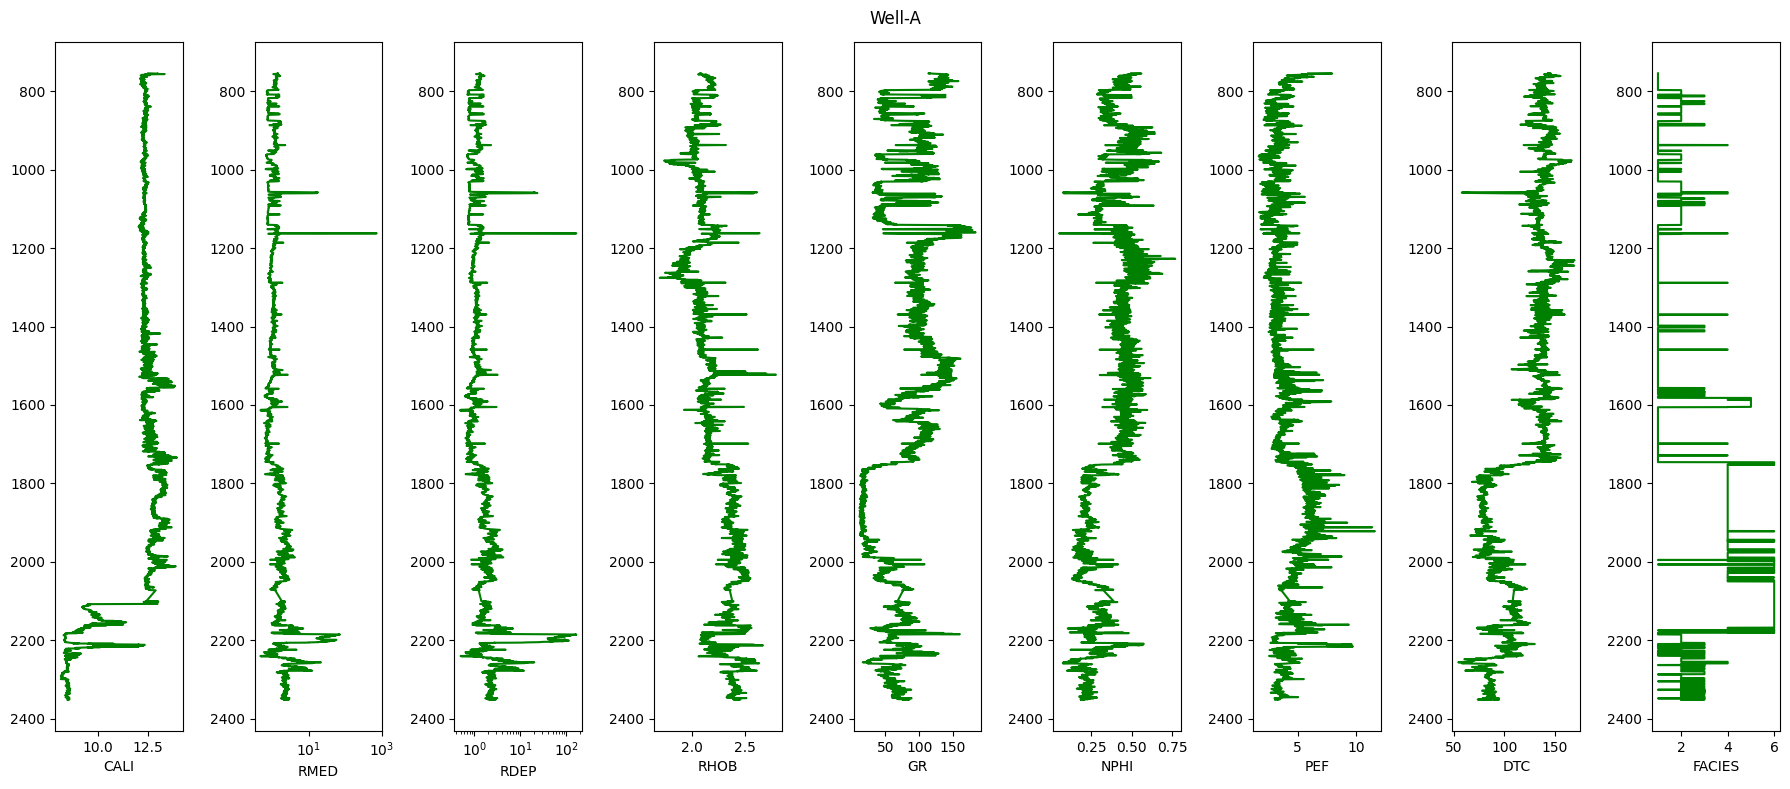

In [234]:
figure, ax = plt.subplots(nrows=1, ncols=9, figsize=(18, 8))
logs = dataA.sort_values(by='DEPTH_MD')
features = ['CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'FACIES']

for i in range(len(features)):
    if features[i] in ['RMED', 'RDEP']:
        ax[i].semilogx(logs[features[i]], logs.DEPTH_MD, '-g')
    else:
        ax[i].plot(logs[features[i]], logs.DEPTH_MD, '-g')
    ax[i].invert_yaxis()
    ax[i].set_xlabel(features[i])

figure.suptitle('Well-A')
plt.tight_layout()
plt.show()

<Axes: xlabel='FACIES'>

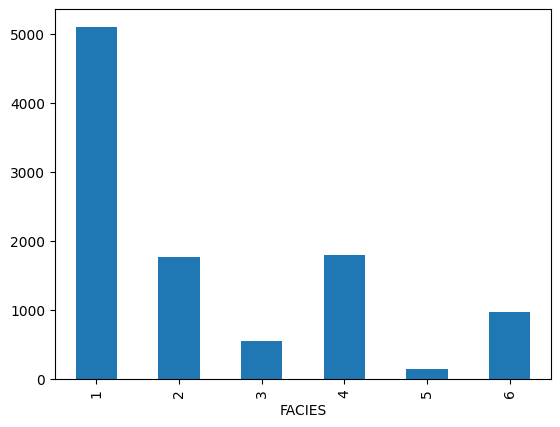

In [235]:
facies_counts = dataA['FACIES'].value_counts().sort_index()
facies_counts.plot(kind='bar')

#### Pair Plot for Wireline Data Reading

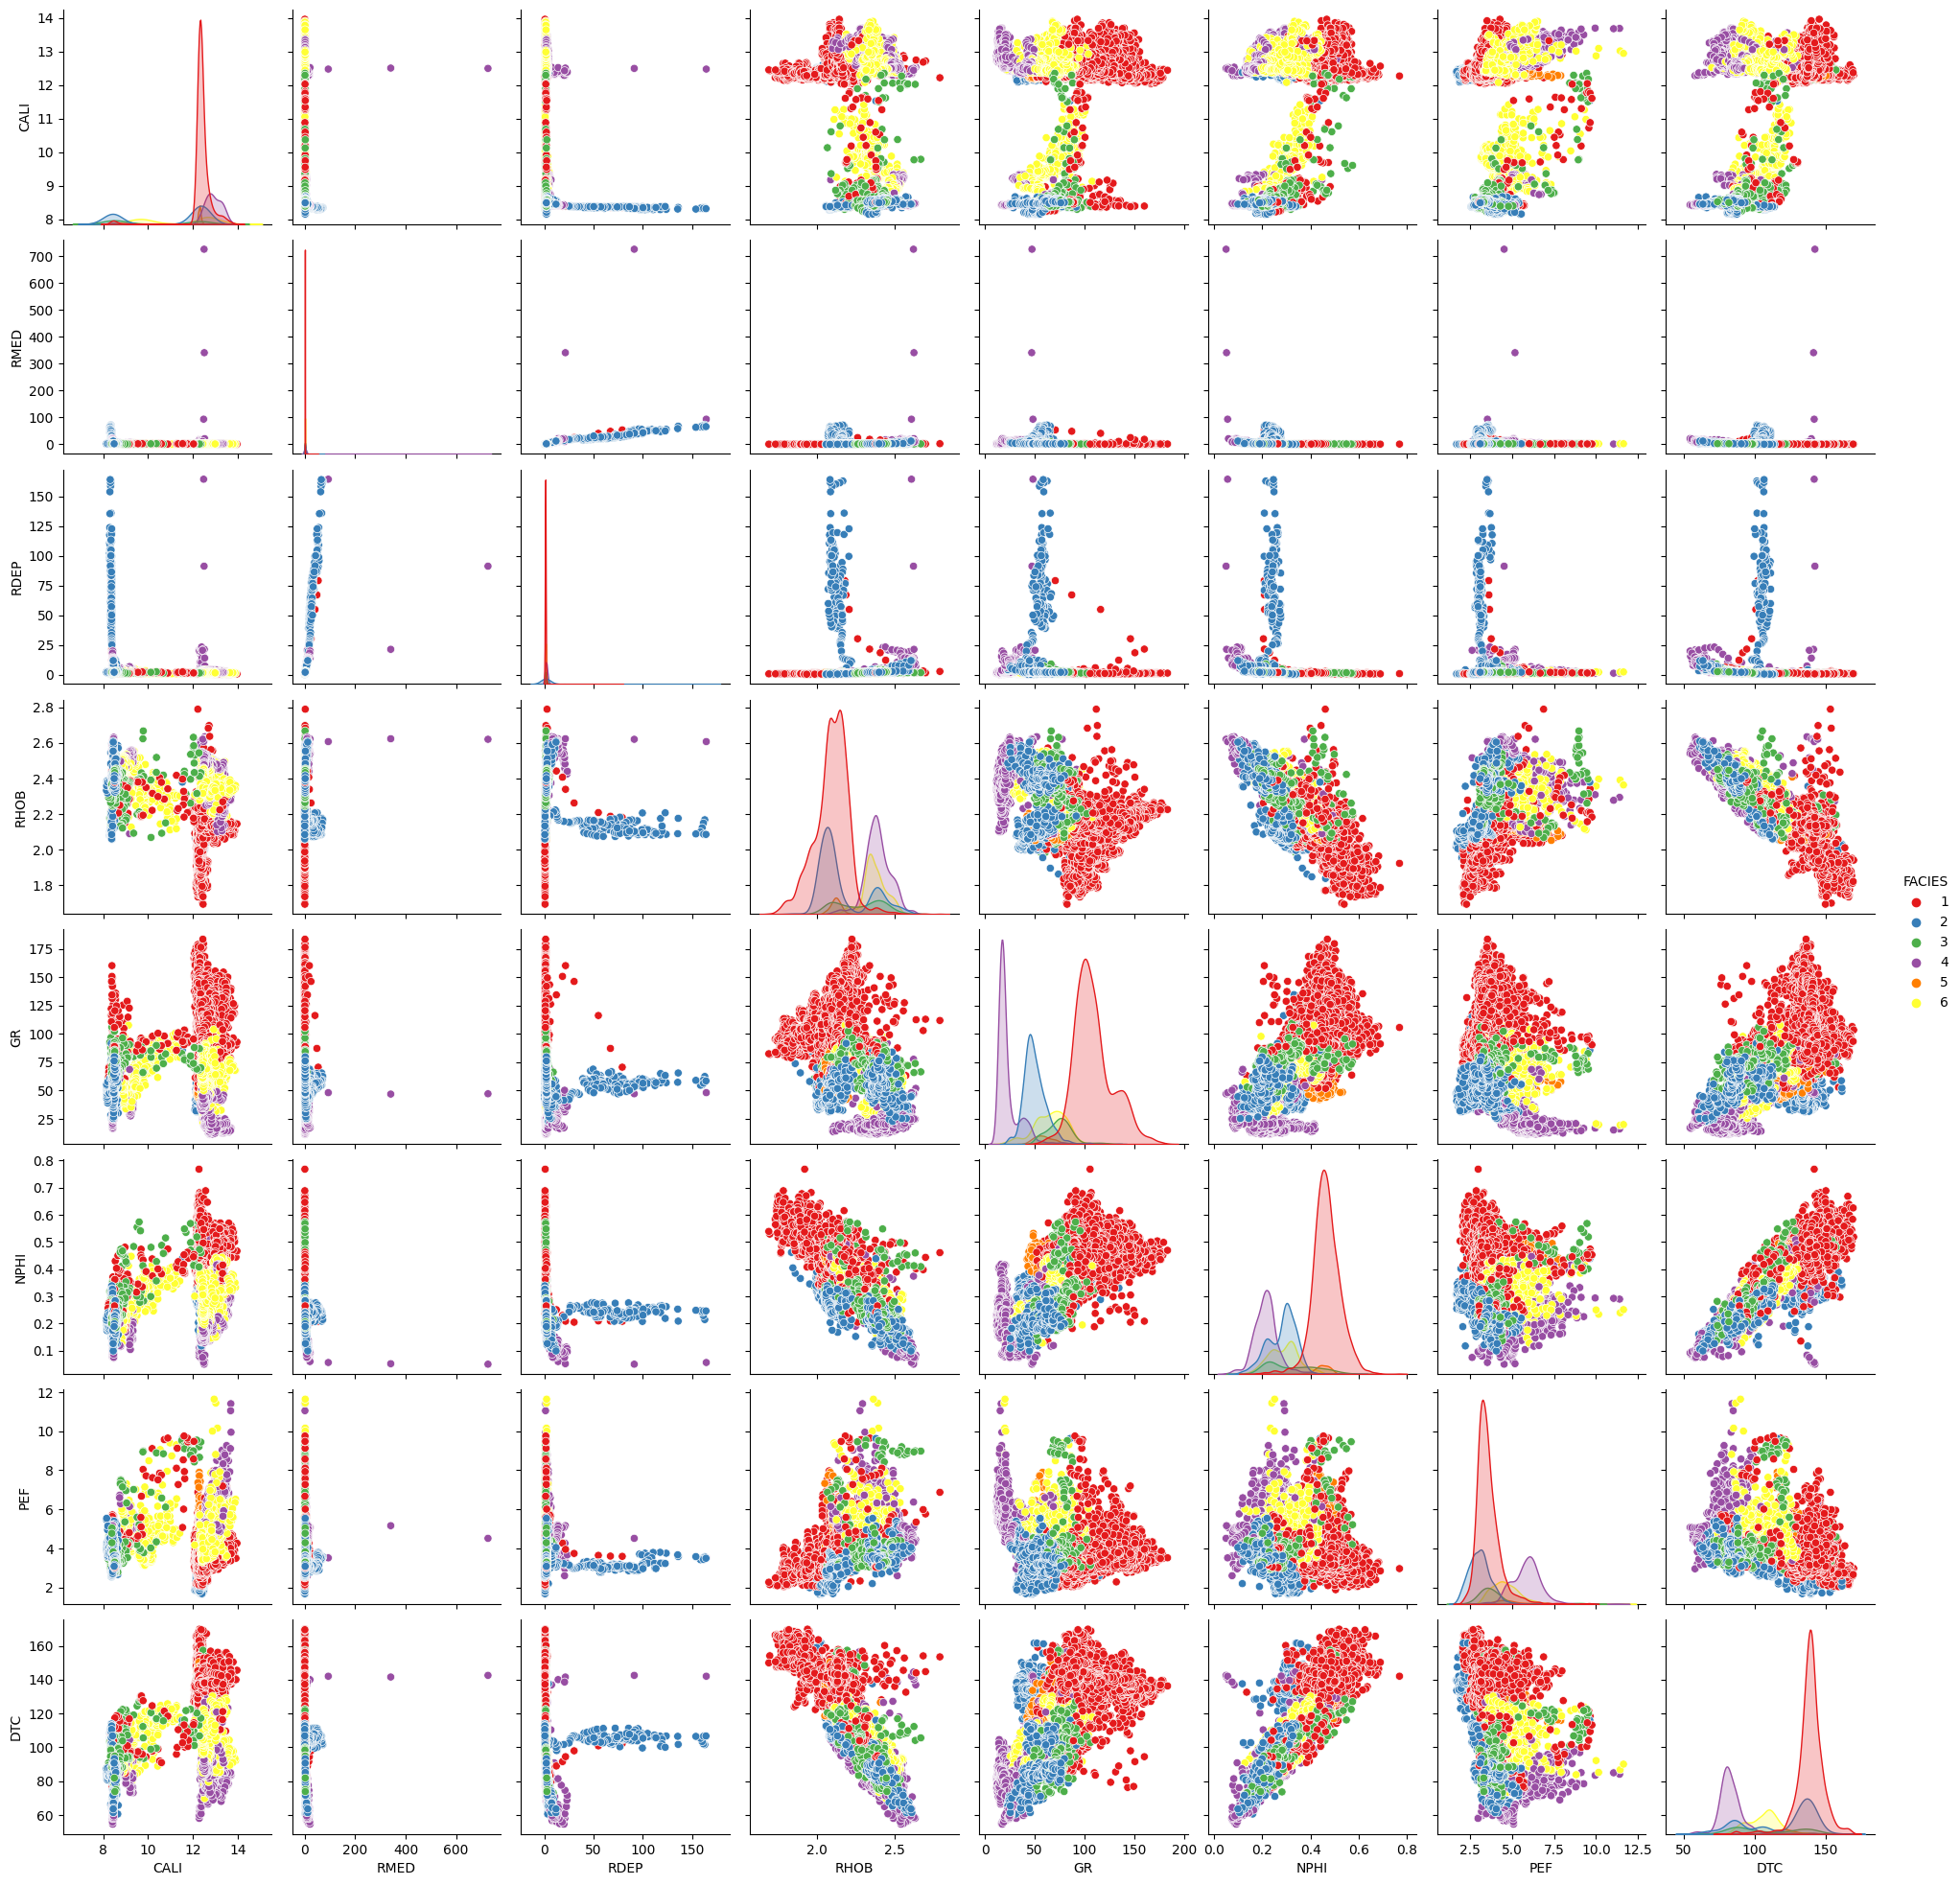

In [236]:
dataA.columns
dummy = dataA.drop(['DEPTH_MD'], axis=1)
sns.pairplot(dummy, hue='FACIES', palette='Set1')

<Axes: >

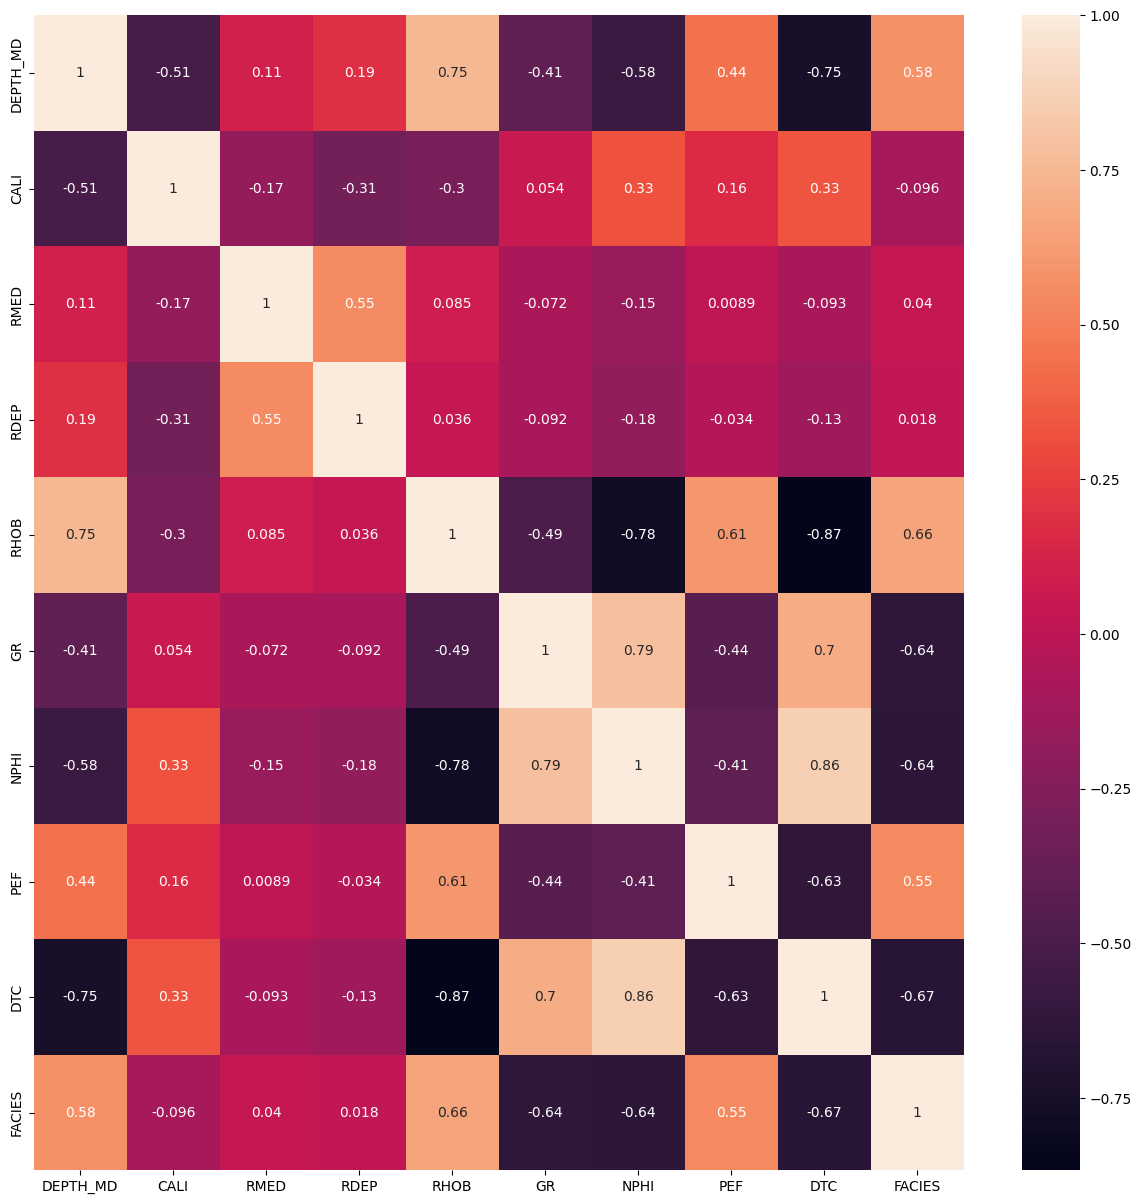

In [237]:
plt.figure(figsize=(15,15))
sns.heatmap(dataA.corr(), annot=True)

#### Split into Matrix Feature and Facies Label

In [238]:
X = dataA.drop(['DEPTH_MD', 'FACIES'], axis=1)
y = dataA['FACIES']

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [240]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Classification

There are several types of model approaches used for the classification of these Facies, namely K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Random Forest (RF).

### K-Nearest Neighbors Classification

#### Hyperparameter Tuning

In [241]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_distributions_knn = {'n_neighbors': np.arange(5, 15, 3),
                       'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(),
                           param_distributions_knn,
                           scoring='accuracy', cv=10)
grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  8, 11, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [242]:
grid_search_knn.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

#### Model Evaluation on Test Set

In [243]:
knn = grid_search_knn.best_estimator_
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

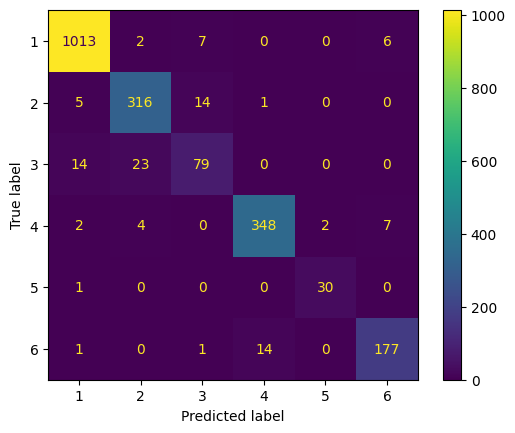

In [244]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_).plot()

In [245]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1028
           2       0.92      0.94      0.93       336
           3       0.78      0.68      0.73       116
           4       0.96      0.96      0.96       363
           5       0.94      0.97      0.95        31
           6       0.93      0.92      0.92       193

    accuracy                           0.95      2067
   macro avg       0.92      0.91      0.91      2067
weighted avg       0.95      0.95      0.95      2067



### Support Vector Machine Classification

#### Hyperparameter Tuning

In [246]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_distributions_svm = {'C': [1, 3, 10],
                        'kernel': ('linear', 'rbf'),
                        'gamma' : ('scale', 'auto')}

grid_search_svm = GridSearchCV(SVC(),
                           param_grid=param_distributions_svm,
                           scoring='accuracy',
                           cv=10)
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 3, 10], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [247]:
grid_search_svm.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

#### Model Evaluation on Test Set

In [248]:
svm = grid_search_svm.best_estimator_
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

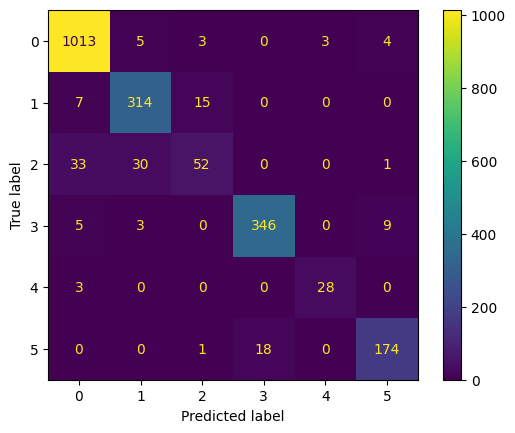

In [249]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm).plot()

In [250]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97      1028
           2       0.89      0.93      0.91       336
           3       0.73      0.45      0.56       116
           4       0.95      0.95      0.95       363
           5       0.90      0.90      0.90        31
           6       0.93      0.90      0.91       193

    accuracy                           0.93      2067
   macro avg       0.89      0.85      0.87      2067
weighted avg       0.93      0.93      0.93      2067



### Random Forest Classification

#### Hyperparameter Tuning

In [251]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

param_distributions_rfc = {'n_estimators': sp_randint(50, 200),
                       'max_depth': sp_randint(3, 7),
                       'max_features': sp_randint(1, 5)}
grid_search_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions_rfc,
                           scoring='accuracy', cv=10)
grid_search_rfc.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002361A5640D0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002361A5093D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002361A500D10>},
                   scoring='accuracy')

In [252]:
grid_search_rfc.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 115}

#### Model Evaluation on Test Set

In [253]:
rfc = grid_search_rfc.best_estimator_
rfc.fit(X_train_scaled, y_train)
y_pred_rfc = rfc.predict(X_test_scaled)

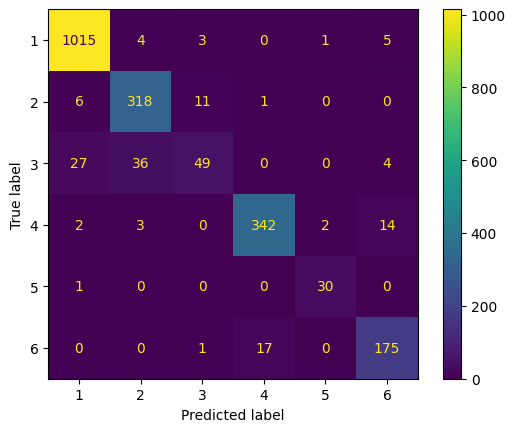

In [254]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=rfc.classes_).plot()

In [255]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98      1028
           2       0.88      0.95      0.91       336
           3       0.77      0.42      0.54       116
           4       0.95      0.94      0.95       363
           5       0.91      0.97      0.94        31
           6       0.88      0.91      0.90       193

    accuracy                           0.93      2067
   macro avg       0.89      0.86      0.87      2067
weighted avg       0.93      0.93      0.93      2067



### Table 1 - Create Dataframe of Model Evaluation

In [256]:
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

r2_knn = r2_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
r2_svm = r2_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
r2_rfc = r2_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc, average='weighted')


In [257]:
combine ={'Model Type': ['KNN', 'SVM', 'RFC'],
       'R2-Score': [r2_knn, r2_svm, r2_rfc],
       'F1-Score': [f1_knn, f1_svm, f1_rfc]
            }
table1 = pd.DataFrame(combine, columns = ['Model Type','R2-Score','F1-Score' ])
table1.round(2)

Model Type  R2-Score  F1-Score
0        KNN      0.92      0.95
1        SVM      0.90      0.93
2        RFC      0.91      0.93

# Blind Dataset (Well-B)

## Data Exploratory & Preprocessing

In [258]:
dataB.describe()

DEPTH_MD          CALI  RSHA         RMED          RDEP  \
count  10025.000000  10025.000000   0.0  9997.000000  10025.000000   
mean    1446.094396     11.668981   NaN     2.325415      2.348347   
std      439.905109      1.697377   NaN    23.227161     25.313340   
min      684.270396      7.886668   NaN     0.323498      0.318176   
25%     1065.182396     12.308855   NaN     0.767469      0.767442   
50%     1446.094396     12.450414   NaN     1.080871      1.088220   
75%     1827.006396     12.569870   NaN     1.434595      1.444758   
max     2207.918396     17.171694   NaN  1366.792481   1596.285523   

              RHOB            GR         NPHI          PEF          DTC   SP  \
count  9683.000000  10025.000000  9898.000000  9683.000000  9951.000000  0.0   
mean      2.209456     85.457099     0.382570     4.260216   125.482436  NaN   
std       0.181823     30.916713     0.127525     1.032569    28.851532  NaN   
min       1.732161     12.951102     0.003064     2.095339    48.621746  NaN   
25%       2.073498     66.734016     0.296297     3.531847   104.567440  NaN   
50%       2.160631     89.030411     0.422447     3.999938   139.798248  NaN   
75%       2.359909    106.611389     0.475887     4.760748   146.639832  NaN   
max       2.744634    268.161072     0.749615    11.062059   177.843659  NaN   

                 BS           ROP         DRHO        FACIES  
count  10025.000000  10002.000000  9818.000000  10025.000000  
mean      11.403843     27.931811     0.007988      2.235910  
std        1.552539     11.119808     0.024426      1.784395  
min        8.500000      3.744495    -0.062866      1.000000  
25%       12.250001     21.120004    -0.003061      1.000000  
50%       12.250001     28.094605     0.003428      1.000000  
75%       12.250001     34.264581     0.011997      4.000000  
max       12.250001    267.704407     0.218060      7.000000

In [259]:
dataB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10025 entries, 0 to 10024
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPTH_MD  10025 non-null  float64
 1   CALI      10025 non-null  float64
 2   RSHA      0 non-null      float64
 3   RMED      9997 non-null   float64
 4   RDEP      10025 non-null  float64
 5   RHOB      9683 non-null   float64
 6   GR        10025 non-null  float64
 7   NPHI      9898 non-null   float64
 8   PEF       9683 non-null   float64
 9   DTC       9951 non-null   float64
 10  SP        0 non-null      float64
 11  BS        10025 non-null  float64
 12  ROP       10002 non-null  float64
 13  DRHO      9818 non-null   float64
 14  FACIES    10025 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.1 MB


#### Remove Data Points That Don't Have A Valid 'RMED' Entry

In [260]:
RMEP_mask_B = dataB['RMED'].notnull().values
dataB = dataB[RMEP_mask_B]
dataB.describe()

DEPTH_MD         CALI  RSHA         RMED         RDEP         RHOB  \
count  9997.000000  9997.000000   0.0  9997.000000  9997.000000  9683.000000   
mean   1444.901720    11.677463   NaN     2.325415     2.352126     2.209456   
std     439.942286     1.692114   NaN    23.227161    25.348667     0.181823   
min     684.270396     7.886668   NaN     0.323498     0.318176     1.732161   
25%    1064.118396    12.313915   NaN     0.767469     0.766941     2.073498   
50%    1443.966396    12.450984   NaN     1.080871     1.089821     2.160631   
75%    1823.814396    12.570384   NaN     1.434595     1.446249     2.359909   
max    2207.918396    17.171694   NaN  1366.792481  1596.285523     2.744634   

                GR         NPHI          PEF          DTC   SP           BS  \
count  9997.000000  9870.000000  9683.000000  9923.000000  0.0  9997.000000   
mean     85.506990     0.382555     4.260216   125.518742  NaN    11.401473   
std      30.944831     0.127701     1.032569    28.883775  NaN     1.554065   
min      12.951102     0.003064     2.095339    48.621746  NaN     8.500000   
25%      66.775642     0.294911     3.531847   104.216831  NaN    12.250001   
50%      89.075745     0.422794     3.999938   139.855087  NaN    12.250001   
75%     106.679733     0.476095     4.760748   146.655663  NaN    12.250001   
max     268.161072     0.749615    11.062059   177.843659  NaN    12.250001   

               ROP         DRHO       FACIES  
count  9974.000000  9813.000000  9997.000000  
mean     27.931803     0.007948     2.225368  
std      11.129692     0.024369     1.775721  
min       3.744495    -0.062866     1.000000  
25%      21.118559    -0.003067     1.000000  
50%      28.099206     0.003423     1.000000  
75%      34.261918     0.011986     4.000000  
max     267.704407     0.218060     7.000000

#### Remove Data Points That Don't Have A Valid 'RHOB' Entry

In [261]:
RHOB_mask_B = dataB['RHOB'].notnull().values
dataB = dataB[RHOB_mask_B]
dataB.describe()

DEPTH_MD         CALI  RSHA         RMED         RDEP         RHOB  \
count  9683.000000  9683.000000   0.0  9683.000000  9683.000000  9683.000000   
mean   1448.398665    11.668387   NaN     2.365101     2.392806     2.209456   
std     434.336254     1.664046   NaN    23.599699    25.755376     0.181823   
min     705.550396     7.886668   NaN     0.323498     0.318176     1.732161   
25%    1073.466396    12.328484   NaN     0.761612     0.762216     2.073498   
50%    1441.382396    12.451578   NaN     1.079590     1.089290     2.160631   
75%    1809.602396    12.566228   NaN     1.443851     1.458169     2.359909   
max    2207.918396    13.590305   NaN  1366.792481  1596.285523     2.744634   

                GR         NPHI          PEF          DTC   SP           BS  \
count  9683.000000  9659.000000  9683.000000  9609.000000  0.0  9683.000000   
mean     85.425271     0.381251     4.260216   125.204676  NaN    11.408295   
std      31.331142     0.128624     1.032569    28.957615  NaN     1.564214   
min      12.951102     0.003064     2.095339    48.621746  NaN     8.500000   
25%      65.422134     0.289968     3.531847   101.749405  NaN    12.250001   
50%      89.258087     0.421929     3.999938   139.937210  NaN    12.250001   
75%     107.033146     0.476566     4.760748   146.528626  NaN    12.250001   
max     268.161072     0.749615    11.062059   164.677231  NaN    12.250001   

               ROP         DRHO       FACIES  
count  9660.000000  9683.000000  9683.000000  
mean     27.936039     0.007816     2.175462  
std      11.164048     0.023585     1.725266  
min       3.744495    -0.062866     1.000000  
25%      21.190013    -0.003009     1.000000  
50%      28.087476     0.003396     1.000000  
75%      34.177645     0.011786     4.000000  
max     267.704407     0.218060     7.000000

#### Remove Data Points That Don't Have A Valid 'NPHI' Entry

In [262]:
NPHI_mask_B = dataB['NPHI'].notnull().values
dataB = dataB[NPHI_mask_B]
dataB.describe()

DEPTH_MD         CALI  RSHA         RMED         RDEP         RHOB  \
count  9659.000000  9659.000000   0.0  9659.000000  9659.000000  9659.000000   
mean   1447.002698    11.670728   NaN     2.363232     2.391414     2.208934   
std     433.876600     1.662933   NaN    23.628642    25.787079     0.181681   
min     705.550396     7.886668   NaN     0.323498     0.318176     1.732161   
25%    1072.554396    12.328865   NaN     0.761596     0.762202     2.073100   
50%    1439.558396    12.451924   NaN     1.079669     1.089524     2.160349   
75%    1806.866396    12.566415   NaN     1.442570     1.457461     2.359340   
max    2206.246396    13.590305   NaN  1366.792481  1596.285523     2.744634   

                GR         NPHI          PEF          DTC   SP           BS  \
count  9659.000000  9659.000000  9659.000000  9596.000000  0.0  9659.000000   
mean     85.387294     0.381251     4.261712   125.213072  NaN    11.410475   
std      31.337072     0.128624     1.033364    28.976216  NaN     1.562771   
min      12.951102     0.003064     2.095339    48.621746  NaN     8.500000   
25%      65.328003     0.289968     3.531739   101.677694  NaN    12.250001   
50%      89.261101     0.421929     4.001956   139.972076  NaN    12.250001   
75%     106.973598     0.476566     4.763946   146.534389  NaN    12.250001   
max     268.161072     0.749615    11.062059   164.677231  NaN    12.250001   

               ROP         DRHO       FACIES  
count  9636.000000  9659.000000  9659.000000  
mean     27.962122     0.007726     2.170515  
std      11.162701     0.023428     1.721683  
min       3.744495    -0.062866     1.000000  
25%      21.214078    -0.003034     1.000000  
50%      28.114761     0.003391     1.000000  
75%      34.185172     0.011760     4.000000  
max     267.704407     0.218060     7.000000

#### Remove Data Points That Don't Have A Valid 'DTC' Entry

In [263]:
DTC_mask_B = dataB['DTC'].notnull().values
dataB = dataB[DTC_mask_B]
dataB.describe()

DEPTH_MD         CALI  RSHA         RMED         RDEP         RHOB  \
count  9596.000000  9596.000000   0.0  9596.000000  9596.000000  9596.000000   
mean   1442.049020    11.690125   NaN     2.340751     2.371121     2.206858   
std     430.955036     1.651002   NaN    23.704434    25.870364     0.180453   
min     705.550396     7.886668   NaN     0.323498     0.318176     1.732161   
25%    1070.160396    12.332040   NaN     0.760606     0.760800     2.072683   
50%    1434.770396    12.453301   NaN     1.074394     1.084628     2.159290   
75%    1799.684396    12.567550   NaN     1.435540     1.448842     2.356312   
max    2196.670396    13.590305   NaN  1366.792481  1596.285523     2.744634   

                GR         NPHI          PEF          DTC   SP           BS  \
count  9596.000000  9596.000000  9596.000000  9596.000000  0.0  9596.000000   
mean     85.108986     0.382911     4.265943   125.213072  NaN    11.429583   
std      31.248746     0.127398     1.035406    28.976216  NaN     1.549937   
min      12.951102     0.003064     2.095339    48.621746  NaN     8.500000   
25%      64.953682     0.294610     3.531328   101.677694  NaN    12.250001   
50%      89.092808     0.422674     4.009386   139.972076  NaN    12.250001   
75%     106.412151     0.476963     4.773856   146.534389  NaN    12.250001   
max     268.161072     0.749615    11.062059   164.677231  NaN    12.250001   

               ROP         DRHO       FACIES  
count  9573.000000  9596.000000  9596.000000  
mean     27.991836     0.007073     2.171634  
std      11.193227     0.022038     1.727270  
min       3.744495    -0.062866     1.000000  
25%      21.158550    -0.003059     1.000000  
50%      28.199427     0.003301     1.000000  
75%      34.249287     0.011562     4.000000  
max     267.704407     0.218060     7.000000

#### Remove Features That Are Not Needed

In [264]:
dataB.drop(labels=['RSHA', 'SP', 'BS', 'ROP', 'DRHO'], axis=1, inplace=True)
dataB

DEPTH_MD       CALI      RMED      RDEP      RHOB          GR  \
140    705.550396  13.000176  1.340541  1.364968  2.125565  122.600769   
141    705.702396  12.758817  1.344673  1.366519  2.126764  126.172905   
142    705.854396  12.695938  1.355193  1.377351  2.131069  131.125244   
143    706.006396  12.646326  1.366960  1.377473  2.140570  129.771545   
144    706.158396  12.580777  1.385934  1.404746  2.151072  123.866242   
...           ...        ...       ...       ...       ...         ...   
9946  2196.062396   8.722105  5.016001  4.727455  2.537510  132.450317   
9947  2196.214396   8.701121  4.574865  4.421765  2.526997  131.869812   
9948  2196.366396   8.710958  4.761734  4.535498  2.520570  127.004021   
9949  2196.518396   8.712500  5.035505  4.870131  2.523459  124.698349   
9950  2196.670396   8.714984  5.148253  5.027130  2.527240  128.527740   

          NPHI       PEF         DTC  FACIES  
140   0.472988  4.017347  157.843994       1  
141   0.476745  3.816923  157.064499       1  
142   0.459273  3.770154  156.237564       1  
143   0.444680  3.732529  155.374191       1  
144   0.428803  3.577061  154.711121       1  
...        ...       ...         ...     ...  
9946  0.112312  3.663386   70.126060       2  
9947  0.116130  3.629687   70.316216       2  
9948  0.120230  3.615547   70.462158       2  
9949  0.126182  3.594654   70.337593       2  
9950  0.128836  3.584660   70.007980       2  

[9596 rows x 10 columns]

## Evaluation

In [265]:
y_blind = dataB['FACIES']
X_blind = dataB.drop(['DEPTH_MD', 'FACIES'], axis=1)
X_blind_scaled = scaler.transform(X_blind)

y_blind_knn = knn.predict(X_blind_scaled)
y_blind_svm = svm.predict(X_blind_scaled)
y_blind_rfc = rfc.predict(X_blind_scaled)

### K-Nearest Neighbors Classification - Blind Dataset

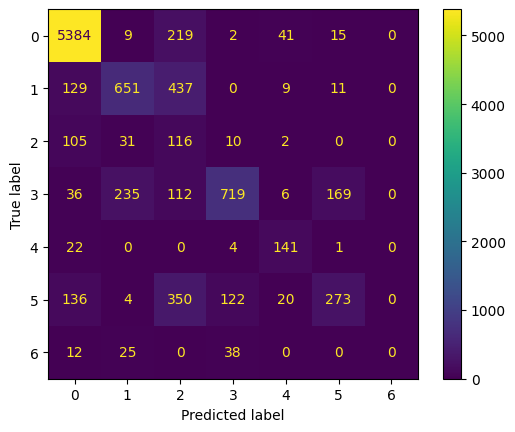

In [266]:
cm_knn_blind = confusion_matrix(y_blind, y_blind_knn)
ConfusionMatrixDisplay(cm_knn_blind).plot()

In [267]:
print(classification_report(y_blind, y_blind_knn))

              precision    recall  f1-score   support

           1       0.92      0.95      0.94      5670
           2       0.68      0.53      0.59      1237
           3       0.09      0.44      0.15       264
           4       0.80      0.56      0.66      1277
           5       0.64      0.84      0.73       168
           6       0.58      0.30      0.40       905
           7       0.00      0.00      0.00        75

    accuracy                           0.76      9596
   macro avg       0.53      0.52      0.50      9596
weighted avg       0.81      0.76      0.77      9596



c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

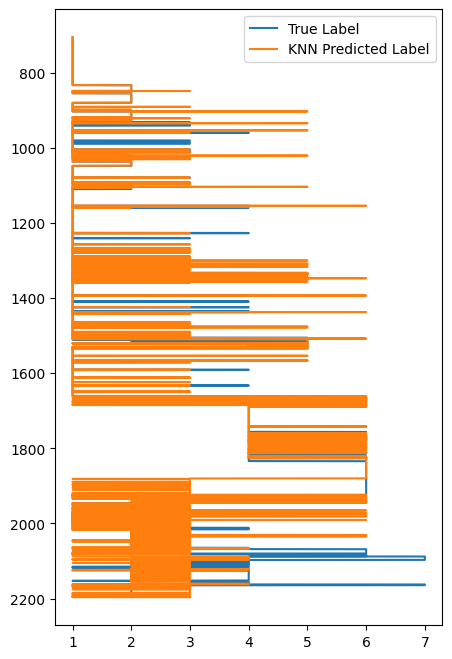

In [268]:
figure, ax = plt.subplots(figsize=(5,8))
logs = dataB.sort_values(by='DEPTH_MD')
ax.plot(logs.FACIES, logs.DEPTH_MD, label='True Label')
ax.plot(y_blind_knn, logs.DEPTH_MD, label='KNN Predicted Label')
ax.invert_yaxis()
ax.legend()

### Support Machine Vector Classification - Blind Dataset

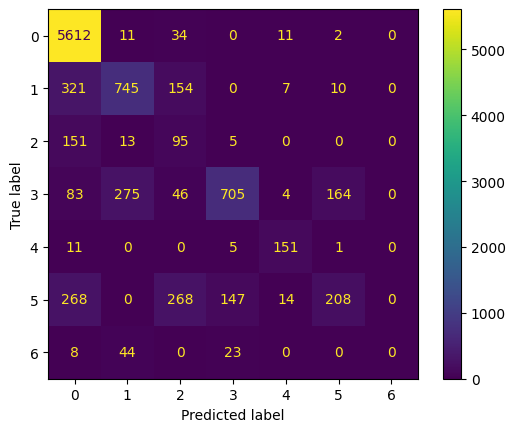

In [269]:
cm_svm_blind = confusion_matrix(y_blind, y_blind_svm)
ConfusionMatrixDisplay(cm_svm_blind).plot()

In [270]:
print(classification_report(y_blind, y_blind_svm))

              precision    recall  f1-score   support

           1       0.87      0.99      0.93      5670
           2       0.68      0.60      0.64      1237
           3       0.16      0.36      0.22       264
           4       0.80      0.55      0.65      1277
           5       0.81      0.90      0.85       168
           6       0.54      0.23      0.32       905
           7       0.00      0.00      0.00        75

    accuracy                           0.78      9596
   macro avg       0.55      0.52      0.52      9596
weighted avg       0.78      0.78      0.77      9596



c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

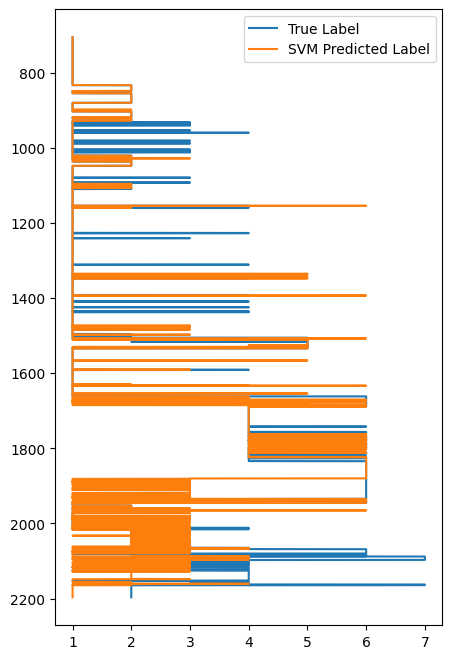

In [271]:
figure, ax = plt.subplots(figsize=(5,8))
logs = dataB.sort_values(by='DEPTH_MD')
ax.plot(logs.FACIES, logs.DEPTH_MD, label='True Label')
ax.plot(y_blind_svm, logs.DEPTH_MD, label='SVM Predicted Label')
ax.invert_yaxis()
ax.legend()

### Random Forest Classification - Blind Dataset

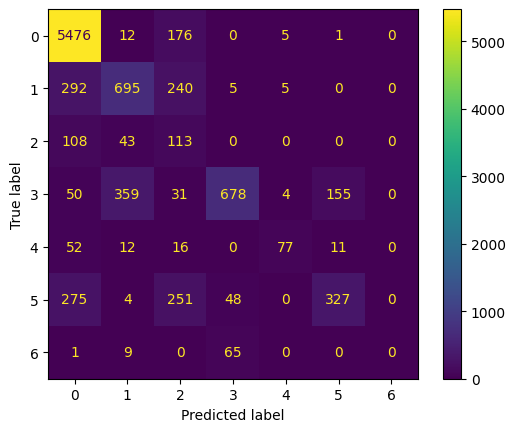

In [272]:
cm_rfc_blind = confusion_matrix(y_blind, y_blind_rfc)
ConfusionMatrixDisplay(cm_rfc_blind).plot()

In [273]:
print(classification_report(y_blind, y_blind_rfc))

              precision    recall  f1-score   support

           1       0.88      0.97      0.92      5670
           2       0.61      0.56      0.59      1237
           3       0.14      0.43      0.21       264
           4       0.85      0.53      0.65      1277
           5       0.85      0.46      0.59       168
           6       0.66      0.36      0.47       905
           7       0.00      0.00      0.00        75

    accuracy                           0.77      9596
   macro avg       0.57      0.47      0.49      9596
weighted avg       0.79      0.77      0.77      9596



c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

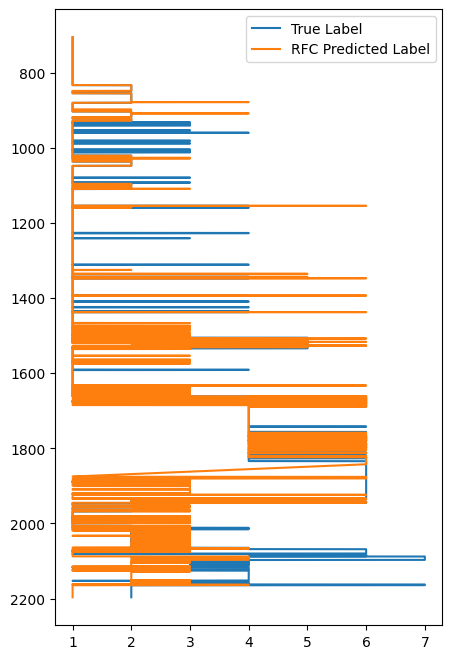

In [274]:
figure, ax = plt.subplots(figsize=(5,8))
logs = dataB.sort_values(by='DEPTH_MD')
ax.plot(logs.FACIES, logs.DEPTH_MD, label='True Label')
ax.plot(y_blind_rfc, logs.DEPTH_MD, label='RFC Predicted Label')
ax.invert_yaxis()
ax.legend()

### Table 2 - Create Dataframe of Blind Evaluation

In [275]:
r2_knn_blind = r2_score(y_blind, y_blind_knn)
f1_knn_blind = f1_score(y_blind, y_blind_knn, average='weighted')
r2_svm_blind = r2_score(y_blind, y_blind_svm)
f1_svm_blind = f1_score(y_blind, y_blind_svm, average='weighted')
r2_rfc_blind = r2_score(y_blind, y_blind_rfc)
f1_rfc_blind = f1_score(y_blind, y_blind_rfc, average='weighted')


In [276]:
combine2 ={'Model Type': ['KNN', 'SVM', 'RFC'],
       'R2-Score': [r2_knn_blind, r2_svm_blind, r2_rfc_blind],
       'F1-Score': [f1_knn_blind, f1_svm_blind, f1_rfc_blind]
            }
table2 = pd.DataFrame(combine2, columns = ['Model Type','R2-Score','F1-Score' ])
table2.round(2)

Model Type  R2-Score  F1-Score
0        KNN      0.51      0.77
1        SVM      0.45      0.77
2        RFC      0.45      0.77

## Compare Facies Log Plot Prediction

# Model Clustering

## K-Means Clustering

In [277]:
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pylab as pl
%matplotlib inline

In [278]:
dataA

DEPTH_MD       CALI      RMED      RDEP      RHOB          GR  \
130     754.179199  12.521476  1.412026  1.315972  2.079341  115.562035   
131     754.331200  12.630612  1.398117  1.315344  2.077192  113.619270   
132     754.483199  12.726549  1.394453  1.323453  2.076251  116.701439   
133     754.635199  12.860774  1.415387  1.336856  2.078405  118.532913   
134     754.787200  12.904781  1.389204  1.309308  2.079669  119.113991   
...            ...        ...       ...       ...       ...         ...   
10638  2351.395200   8.495781  2.419575  2.432598  2.446120   83.710793   
10639  2351.547200   8.501786  2.298789  2.297934  2.444777   85.365189   
10640  2351.699200   8.514043  2.244636  2.242675  2.433254   84.372864   
10641  2351.851200   8.496308  2.178133  2.187869  2.415897   79.731628   
10642  2352.003200   8.486908  2.135648  2.147878  2.399593   76.157021   

           NPHI       PEF         DTC  FACIES  
130    0.495291  5.906584  143.338440       1  
131    0.501820  6.384551  143.411118       1  
132    0.522005  7.069182  143.314133       1  
133    0.546147  7.836967  143.667496       1  
134    0.558983  7.969746  145.145447       1  
...         ...       ...         ...     ...  
10638  0.206534  3.299096   81.848648       3  
10639  0.198399  3.322829   91.259453       3  
10640  0.206373  3.293875   94.804581       3  
10641  0.199548  3.156241   93.250061       2  
10642  0.189353  3.086096   90.658196       2  

[10331 rows x 10 columns]

In [279]:
dataA.drop(['FACIES'], axis=1, inplace=True)

In [289]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
dataA_scaled = scaler2.fit(dataA)
dataA_scaled = scaler2.transform(dataA)
dataA_scaled

array([[-1.7169902 ,  0.39754788, -0.06338229, ...,  1.08370154,
         1.52058832,  0.88396445],
       [-1.71665964,  0.47673649, -0.06492858, ...,  1.13820886,
         1.90228038,  0.88684746],
       [-1.71632908,  0.54634743, -0.06533598, ...,  1.3067171 ,
         2.44900949,  0.88300022],
       ...,
       [ 1.75721566, -2.51021267,  0.02918218, ..., -1.32833418,
        -0.56585417, -1.04129798],
       [ 1.75754622, -2.52308069,  0.02178888, ..., -1.385312  ,
        -0.67576482, -1.10296335],
       [ 1.75787678, -2.52990152,  0.01706566, ..., -1.47042536,
        -0.73178112, -1.20577861]])

In [292]:
km = KMeans(n_clusters=5, init='k-means++', n_init=100, max_iter=1000)
km.fit(dataA_scaled)

KMeans(max_iter=1000, n_clusters=5, n_init=100)

In [296]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [297]:
km.inertia_

24977.017933298386

In [295]:
pd.DataFrame(km.cluster_centers_)

0         1          2         3         4         5         6  \
0 -0.624025  0.323287  -0.108374 -0.152440 -0.625707  0.496055  0.606115   
1  1.501896 -2.246663   0.089556  0.046202  1.097312 -0.324982 -0.944347   
2  0.792069  0.625454  -0.002999 -0.045426  1.149269 -1.212688 -1.111186   
3 -0.829597  0.382404  59.108884  5.706111  2.560750 -0.799007 -2.621546   
4  1.396790 -2.604485   3.821539  8.308175 -0.396231 -0.516326 -1.024263   

          7         8  
0 -0.463843  0.694456  
1  0.000212 -1.082161  
2  1.389760 -1.308457  
3  0.670103  0.832295  
4 -0.663699 -0.590486

In [284]:
pd.DataFrame(scaler.inverse_transform(pd.DataFrame(km.cluster_centers_)),
            columns=dataA.columns)

DEPTH_MD       CALI       RMED       RDEP      RHOB        GR      NPHI  \
0  1253.339712  12.416584   1.007758   1.028525  2.084759  95.90527  0.438646   
1  2035.162723  11.311463   2.264766   2.353323  2.381058  44.69543  0.240548   
2  2169.792597   8.449339  44.097288  80.176324  2.132520  57.52513  0.239770   

        PEF         DTC  
0  3.422554  138.646357  
1  5.054203   90.471205  
2  3.198828  106.724728

### Output Target 1 : Elbow Method

Text(0.5, 1.0, 'The Elbow Method Showing the Optimal k')

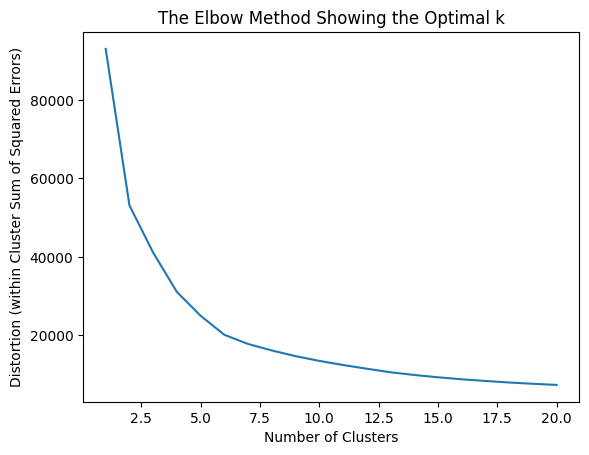

In [285]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1,21):
  km = KMeans(n_clusters=i,random_state=1000,
  init='k-means++',  n_init=1000,  max_iter=500)
  km.ﬁt(dataA_scaled)
  distortions.append(km.inertia_)

plt.plot(range(1,21),distortions)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (within Cluster Sum of Squared Errors)')
plt.title('The Elbow Method Showing the Optimal k')

### Output Target 2 : Average Silhouette Score at Various Number of Cluster

c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0.5, 1.0, 'Silhoutte Analysis  Showing  the  Optimal  k')

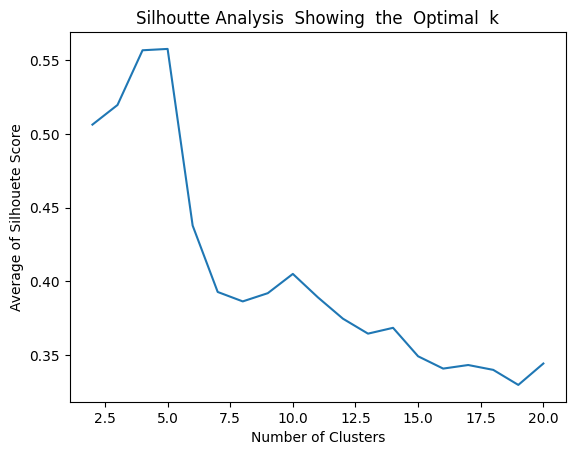

In [286]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
silhouette_avg = []
for i in range_n_clusters:
  km = KMeans(n_clusters=i)
  km.fit(dataA_scaled)
  cluster_labels = km.labels_
  silhouette_avg.append(silhouette_score(dataA_scaled, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Number of Clusters')
plt.ylabel('Average of Silhouete Score')
plt.title('Silhoutte Analysis  Showing  the  Optimal  k')

### Output Target 3 : Box-Whisker Plot of Each Cluster

In [303]:
dataA_scaled_df = pd.DataFrame((dataA_scaled), columns=dataA.columns)
dataA_scaled_df['CLUSTER']=km.labels_
dataA_scaled_df

DEPTH_MD      CALI      RMED      RDEP      RHOB        GR      NPHI  \
0     -1.716990  0.397548 -0.063382 -0.121929 -0.664438  1.018974  1.083702   
1     -1.716660  0.476736 -0.064929 -0.121996 -0.677210  0.967436  1.138209   
2     -1.716329  0.546347 -0.065336 -0.121137 -0.682806  1.049201  1.306717   
3     -1.715999  0.643740 -0.063009 -0.119717 -0.670003  1.097787  1.508273   
4     -1.715668  0.675671 -0.065919 -0.122635 -0.662489  1.113202  1.615431   
...         ...       ...       ...       ...       ...       ...       ...   
10326  1.756555 -2.523463  0.048631 -0.003633  1.515304  0.174016 -1.326990   
10327  1.756885 -2.519106  0.035203 -0.017900  1.507322  0.217905 -1.394901   
10328  1.757216 -2.510213  0.029182 -0.023754  1.438846  0.191580 -1.328334   
10329  1.757546 -2.523081  0.021789 -0.029560  1.335695  0.068456 -1.385312   
10330  1.757877 -2.529902  0.017066 -0.033797  1.238798 -0.026372 -1.470425   

            PEF       DTC  CLUSTER  
0      1.520588  0.883964        0  
1      1.902280  0.886847        0  
2      2.449009  0.883000        0  
3      3.062143  0.897018        0  
4      3.168177  0.955646        0  
...         ...       ...      ...  
10326 -0.561685 -1.555240        1  
10327 -0.542732 -1.181928        1  
10328 -0.565854 -1.041298        1  
10329 -0.675765 -1.102963        1  
10330 -0.731781 -1.205779        1  

[10331 rows x 10 columns]

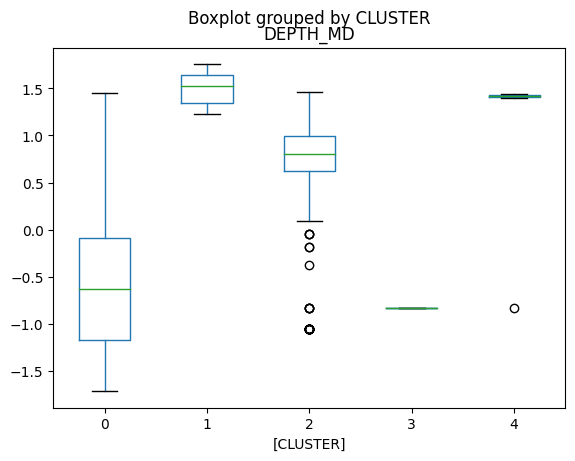

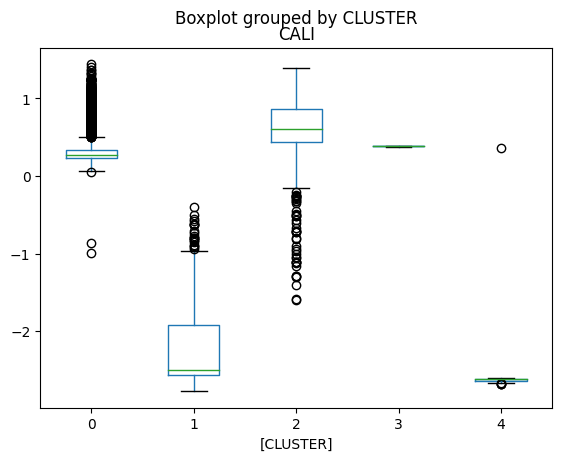

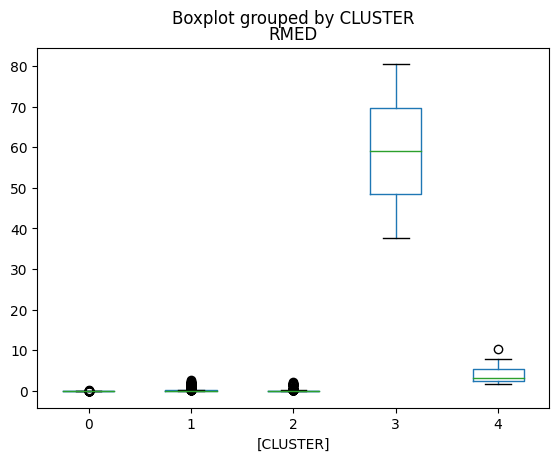

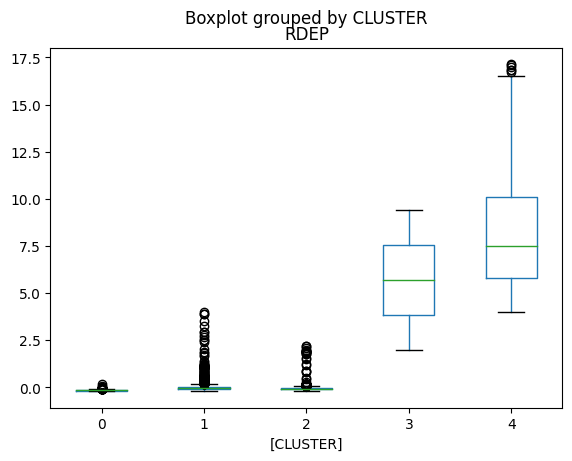

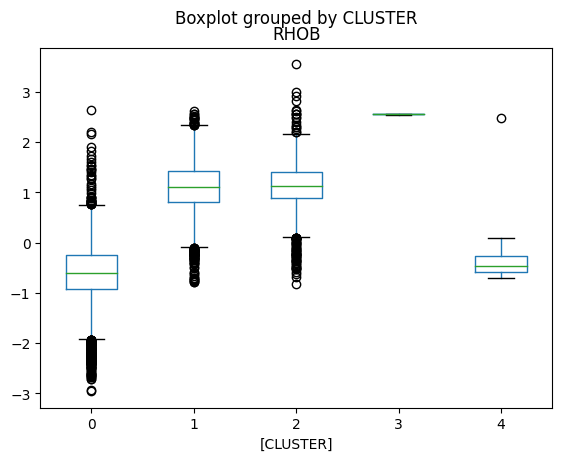

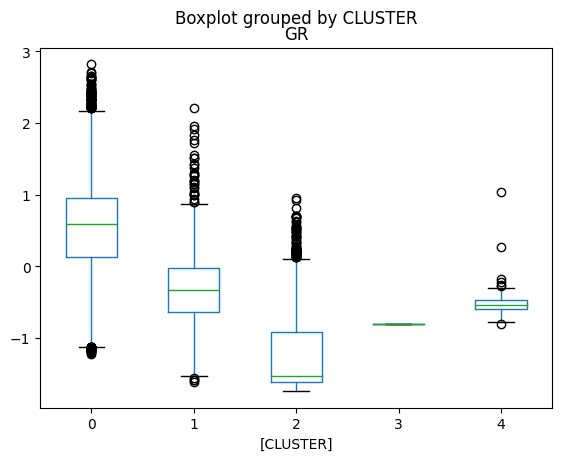

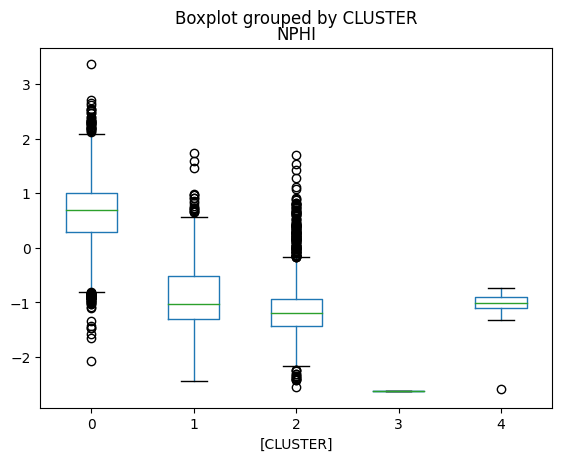

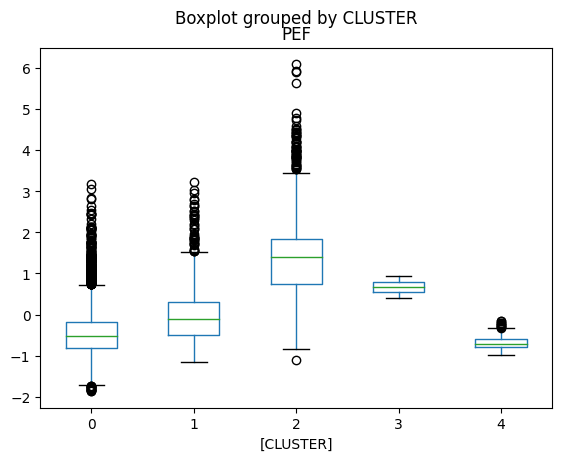

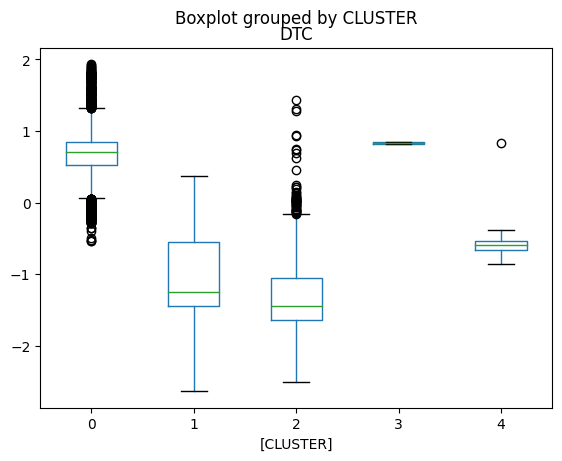

In [304]:
for i in range((len(dataA_scaled_df.columns)-1)):
  dataA_scaled_df.boxplot(column=[dataA_scaled_df.columns[i]], by=['CLUSTER'], grid=False)

### Output Target 4 : Pair Plot per Cluster

In [305]:
dataA_scaled_df.head()

DEPTH_MD      CALI      RMED      RDEP      RHOB        GR      NPHI  \
0 -1.716990  0.397548 -0.063382 -0.121929 -0.664438  1.018974  1.083702   
1 -1.716660  0.476736 -0.064929 -0.121996 -0.677210  0.967436  1.138209   
2 -1.716329  0.546347 -0.065336 -0.121137 -0.682806  1.049201  1.306717   
3 -1.715999  0.643740 -0.063009 -0.119717 -0.670003  1.097787  1.508273   
4 -1.715668  0.675671 -0.065919 -0.122635 -0.662489  1.113202  1.615431   

        PEF       DTC  CLUSTER  
0  1.520588  0.883964        0  
1  1.902280  0.886847        0  
2  2.449009  0.883000        0  
3  3.062143  0.897018        0  
4  3.168177  0.955646        0

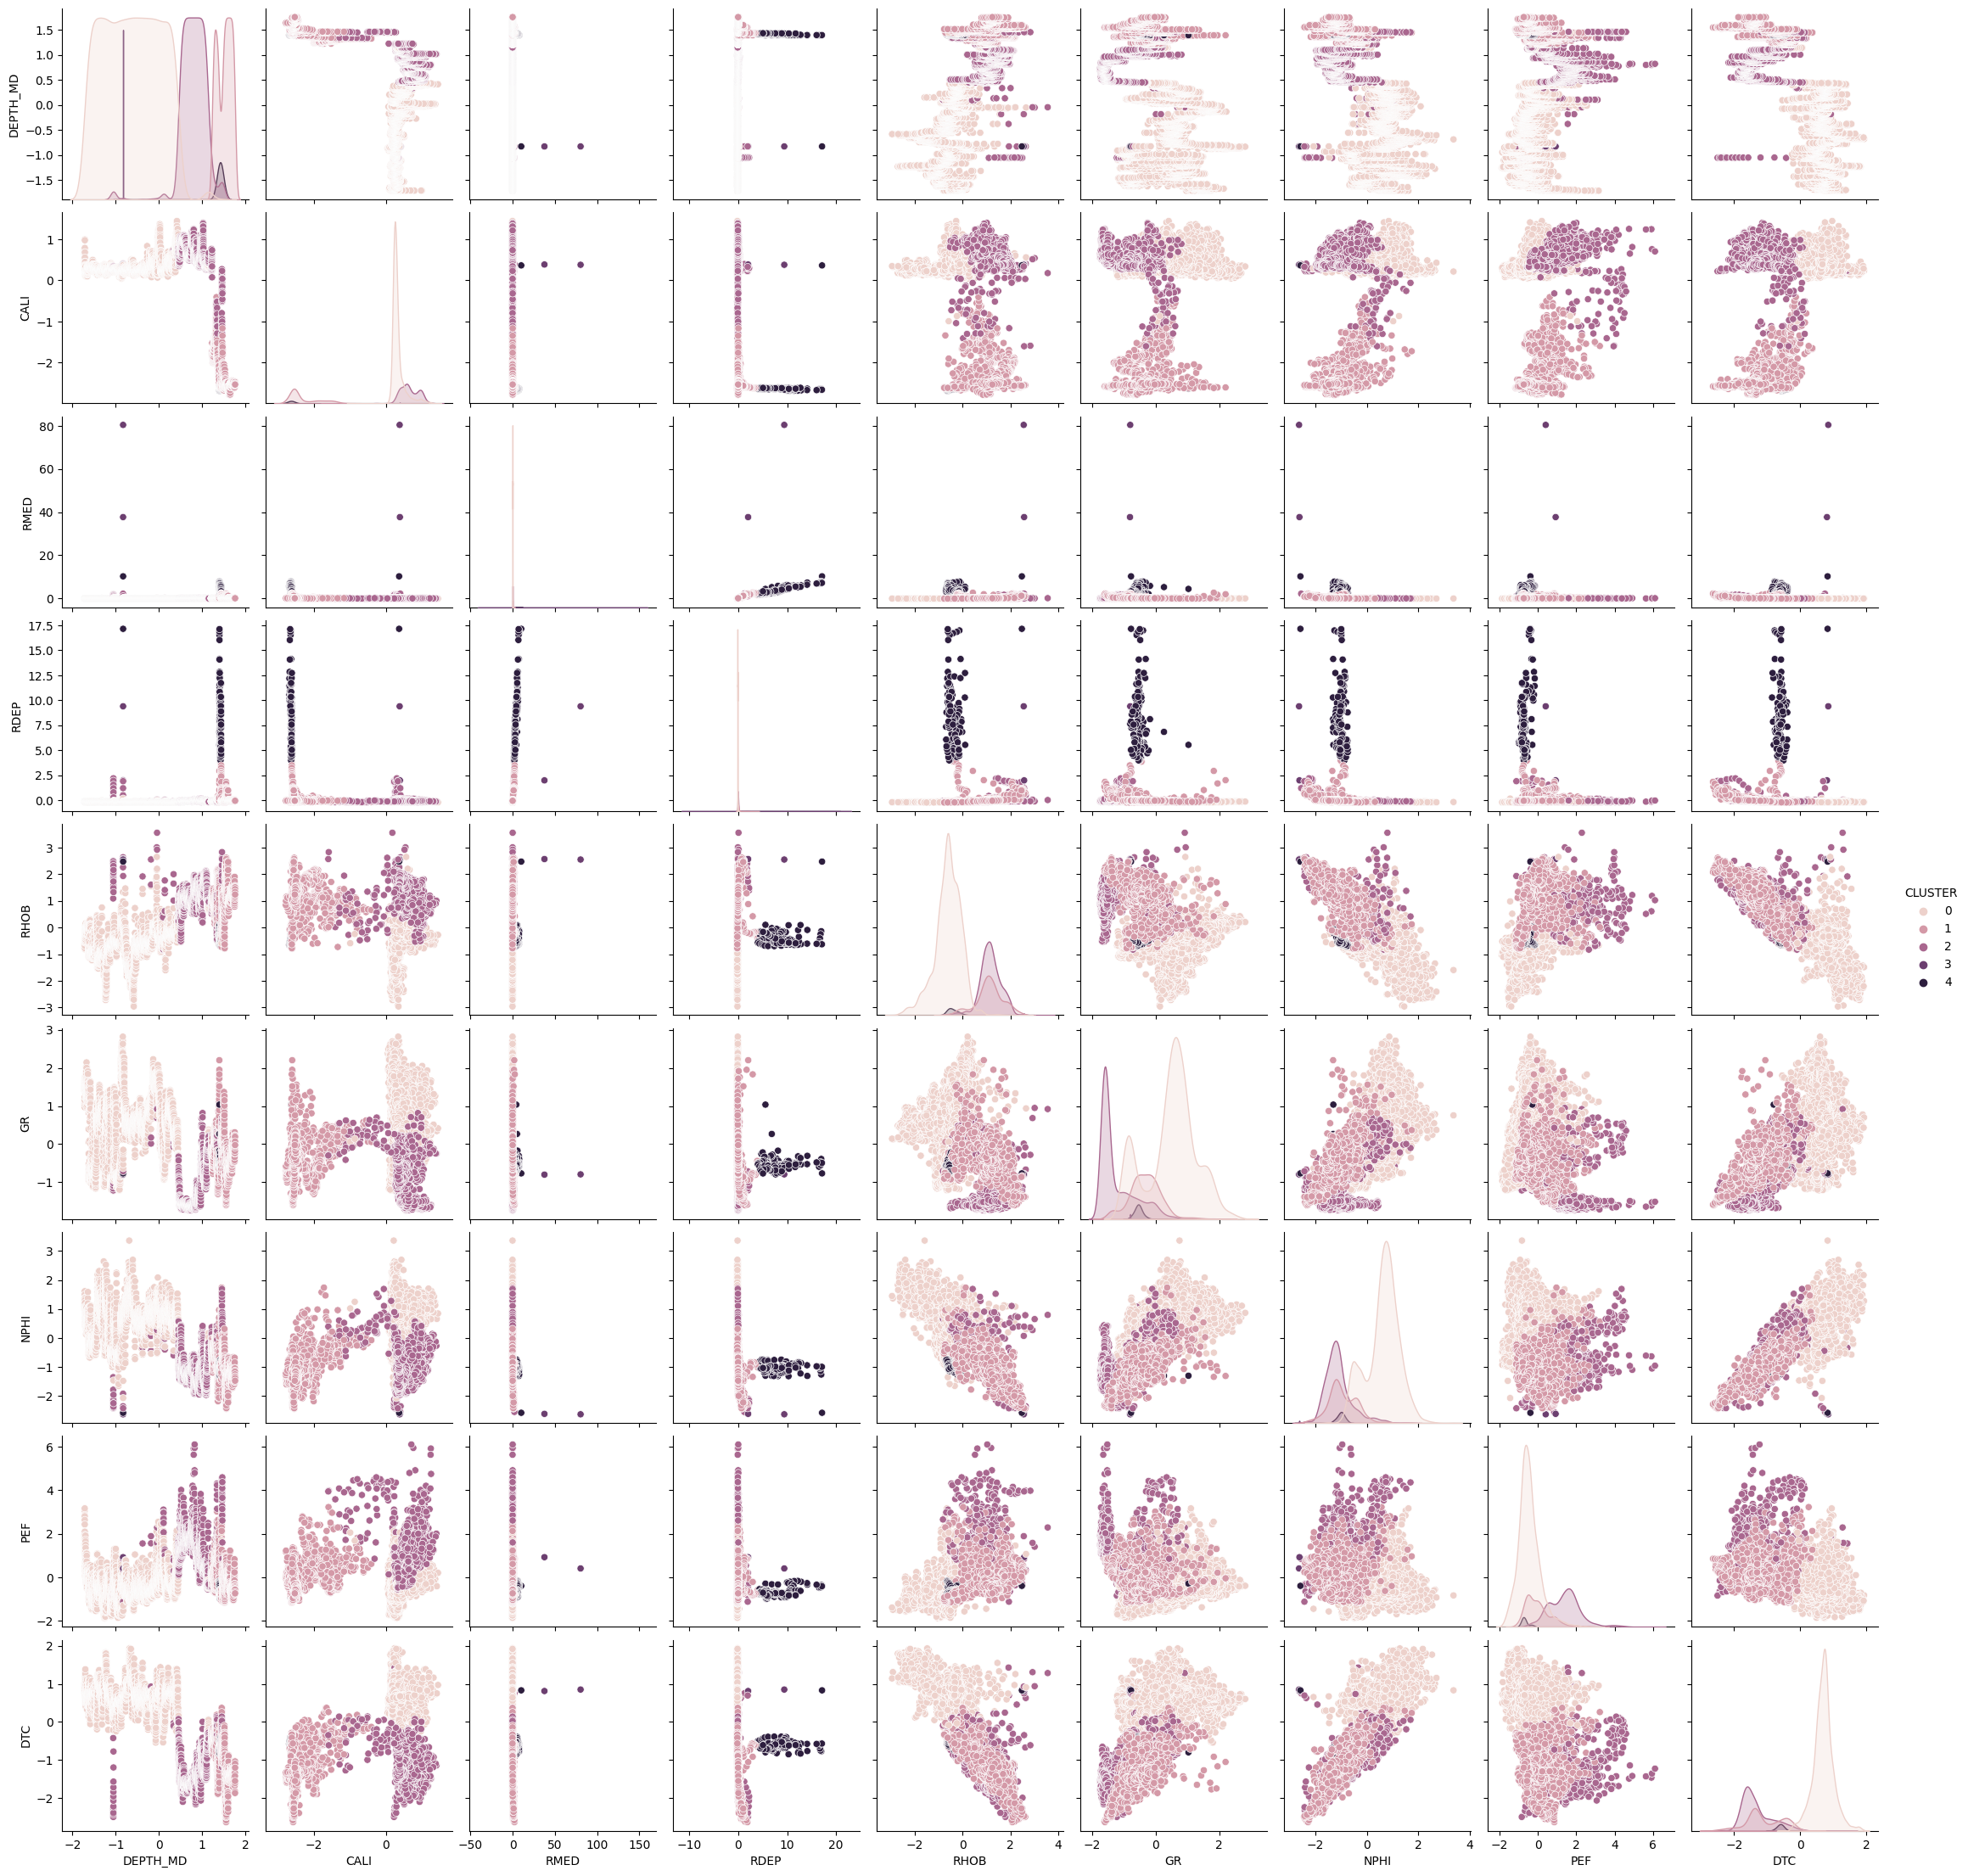

In [306]:
Group_by=dataA_scaled_df.groupby(by='CLUSTER').mean()
dataA_scaled_df.groupby(by='CLUSTER').count()

sns.pairplot(dataA_scaled_df, hue="CLUSTER")

In [308]:
dataA_scaled_df.groupby(by='CLUSTER').count()

DEPTH_MD  CALI  RMED  RDEP  RHOB    GR  NPHI   PEF   DTC
CLUSTER                                                          
0            6542  6542  6542  6542  6542  6542  6542  6542  6542
1            1423  1423  1423  1423  1423  1423  1423  1423  1423
2            2241  2241  2241  2241  2241  2241  2241  2241  2241
3               2     2     2     2     2     2     2     2     2
4             123   123   123   123   123   123   123   123   123